In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import sklearn
import random
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error

In [65]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error

In [66]:
filename = 'Dataset/Sensor_Discrimination_normalized.csv'
df=pd.read_csv(filename)
# shuffle the DataFrame rows
df = df.sample(frac = 1) #frac = fraction
dataset=df.iloc[:,:-1]
label=df.iloc[:,-1]
print(dataset)
print(label)

            F2        F3        F1       F11        F4        F6       F10  \
339   0.802995  0.927826  0.594123  0.175745  0.584899  0.193595  0.182003   
1158  0.259037  0.964334  0.899510  0.317376  0.938966  0.509346  0.967244   
1830  0.247701  0.898721  0.702253  0.194149  0.771661  0.411765  0.256212   
1452  0.622246  0.644684  0.280705  0.172074  0.555796  0.044283  0.202937   
451   0.776898  0.783311  0.564349  0.247163  0.685016  0.082875  0.340550   
...        ...       ...       ...       ...       ...       ...       ...   
245   0.137861  0.937584  0.916748  0.984929  0.985864  0.734195  0.971197   
1705  0.641283  0.933378  0.789814  0.466667  0.877432  0.321056  0.915474   
1457  0.657540  0.610532  0.320274  0.179787  0.530517  0.042936  0.201619   
1657  0.403636  0.660666  0.653281  0.200709  0.689007  0.122815  0.250941   
223   0.426310  0.510767  0.228404  0.180142  0.416930  0.005033  0.178087   

            F9        F5      F7      F12      F8  
339   0.154

# PCA implement

In [67]:
pcaTrain = PCA(n_components=6).fit(dataset)# --train-- pca with the "dataset" Dataframe
print(pcaTrain)
compressed_dataset_X= pcaTrain.transform(dataset) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X))
print(len(compressed_dataset_X[0]))
print(compressed_dataset_X)

PCA(n_components=6)
<class 'numpy.ndarray'>
6
[[-3.79713075 -0.92039075  0.06824349  0.03824535  0.23325957  0.12357748]
 [-3.02743211  0.91004451  0.27091498 -0.21075059  0.01847881 -0.18075476]
 [-3.83007756 -0.56891818 -0.31029451 -0.16771364 -0.0663768   0.08290127]
 ...
 [ 1.35402501 -0.91304382  0.2140062   0.10822778 -0.05955368  0.0123765 ]
 [ 1.82156269 -0.56447424 -0.01400076 -0.08751711 -0.04924772  0.0237216 ]
 [ 1.80099503 -0.98560002  0.16898436  0.05853036 -0.33323176 -0.02736764]]


In [68]:
dataset_arr=dataset.to_numpy()
# from NecessaryModules.splitData import split_data
X_train,X_comb, y_train,y_comb = train_test_split(dataset_arr, label, test_size=0.4, random_state=42)
print(len(X_train))

1327


In [69]:
X_valid, X_test, y_valid, y_test = train_test_split(X_comb, y_comb, test_size=0.50, random_state=42)
print(len(X_valid))

442


In [70]:
compressed_dataset_X_train= pcaTrain.transform(X_train) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_train))
print(len(compressed_dataset_X_train))
print(compressed_dataset_X_train)

compressed_dataset_X_valid= pcaTrain.transform(X_valid) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_valid))
print(len(compressed_dataset_X_valid))
print(compressed_dataset_X_valid)

compressed_dataset_X_test= pcaTrain.transform(X_test) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_test))
print(len(compressed_dataset_X_test))
print(compressed_dataset_X_test)

<class 'numpy.ndarray'>
1327
[[ 1.14283459 -0.15621602 -0.27123537 -0.1605309  -0.0246063  -0.00978981]
 [-3.81989475 -0.9424924  -0.04513249  0.06225578  0.17859383  0.07987313]
 [-3.02468608 -0.48277801  0.0905979  -0.02039975  0.36373179  0.11062757]
 ...
 [ 1.28577178 -0.29587899 -0.23508751 -0.13743094  0.01849441  0.05861232]
 [-3.25383883 -0.35374925 -0.32799795 -0.22660994 -0.08153252  0.07584645]
 [ 0.84010606 -0.90684502  0.31369749  0.16971851  0.02272835 -0.02026546]]
<class 'numpy.ndarray'>
442
[[ 1.80941907e+00 -7.64476877e-01  1.75626189e-01 -2.90385333e-02
  -2.39607038e-01 -2.35946857e-02]
 [-3.75381048e+00 -1.29405318e+00  3.35651119e-01  2.56812262e-01
  -8.78314584e-02  1.59779324e-02]
 [ 1.55223586e+00  7.25552693e-03 -2.61800569e-01 -3.05475664e-01
   1.02079475e-01  1.51004446e-01]
 ...
 [ 1.30167755e+00 -4.31881932e-01 -1.65569632e-05 -1.12775389e-01
  -6.21175874e-03  1.65844208e-02]
 [ 1.31210499e+00 -8.57756674e-01  3.11478771e-01  1.73475821e-01
   7.6103253

# reshape the data 

In [71]:
compressed_dataset_X_valid.shape

(442, 6)

In [72]:
X_train_arr=compressed_dataset_X_train.reshape(compressed_dataset_X_train.shape[0],compressed_dataset_X_train.shape[1],1)
X_train_arr.shape

(1327, 6, 1)

In [73]:
# X_valid_arr=compressed_dataset_X_valid.to_numpy()
X_valid_arr=compressed_dataset_X_valid.reshape(compressed_dataset_X_valid.shape[0],compressed_dataset_X_valid.shape[1],1)
X_valid_arr.shape

(442, 6, 1)

In [74]:
X_test_arr=compressed_dataset_X_test.reshape(compressed_dataset_X_test.shape[0],compressed_dataset_X_test.shape[1],1)
X_test_arr.shape

(443, 6, 1)

In [75]:
# for "y"

y_train_arr=np.array(y_train)
y_train_arr=y_train_arr.reshape(y_train_arr.shape[0],1)

y_valid_arr=np.array(y_valid)
y_valid_arr=y_valid_arr.reshape(y_valid_arr.shape[0],1)

y_test_arr=np.array(y_test)
y_test_arr=y_test_arr.reshape(y_test_arr.shape[0],1)

In [76]:
y_test_arr.shape

(443, 1)

# one hot encode

In [77]:
from keras.utils import to_categorical
# one hot encoding
y_train_arr = to_categorical(y_train, 3)
y_valid_arr = to_categorical(y_valid, 3)
y_test_arr = to_categorical(y_test, 3)

In [78]:
y_test_arr

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

# model

In [79]:

# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Conv1D
from keras.layers import MaxPooling1D


In [80]:
import tensorflow as tf
callback=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=4,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [81]:
# Global value
verbose, epochs, batch_size = 1, 100, 40


In [82]:
# fit and evaluate a model
import optuna
from matplotlib import pyplot as plt

def optimize_model(trainX, trainy,validX,validy):
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], 3
    def objective_model1(trial):
    # Define hyperparameters to be tuned
     
     filters = trial.suggest_int('filters', 32, 128)
     
     dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
     dense_units = trial.suggest_int('dense_units', 50, 200)
     
     # Build the CNN model
     model = Sequential()
     model.add(Conv1D(filters=filters, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
     model.add(Conv1D(filters=filters, kernel_size=2, activation='relu'))
     model.add(Dropout(dropout_rate))
     model.add(MaxPooling1D(pool_size=2))
     model.add(Flatten())
     model.add(Dense(dense_units, activation='relu'))
     model.add(Dense(n_outputs, activation='softmax'))
 
     # Compile the model
     model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 
     # Fit the model
     history = model.fit(trainX, trainy, validation_data=(validX, validy), epochs=epochs,callbacks=[callback],batch_size=batch_size, verbose=verbose)
    
    # Return the validation accuracy as the objective value
     return history.history['val_accuracy'][-1]
    study = optuna.create_study(direction='maximize')
    study.optimize(objective_model1, n_trials= 8, 
                   #timeout=600
                   )#The maximum time (in seconds) allowed for the optimization process to run.
    # Get the best hyperparameters
    best_params = study.best_params
    print("Best Hyperparameters:", best_params)


    return best_params
 



In [83]:
# summarize scores
def summarize_results(scores):
 print(scores)
 m, s = mean(scores), std(scores)
 print('Test Accuracy: %.3f%% (+/-%.3f)' % (m, s))
 

# Calculate the accuracy

In [84]:

best_params=optimize_model(X_train_arr, y_train_arr, X_valid_arr, y_valid_arr)

[I 2024-02-21 17:19:17,112] A new study created in memory with name: no-name-2c9127c5-05f9-495d-a5a5-d63aea5fb633


Epoch 1/100
34/34 [==============================] - 2s 10ms/step - loss: 0.8325 - accuracy: 0.7114 - val_loss: 0.4962 - val_accuracy: 0.8688
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.3260 - accuracy: 0.8968 - val_loss: 0.1668 - val_accuracy: 0.9502
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 0.2034 - accuracy: 0.9269 - val_loss: 0.1353 - val_accuracy: 0.9638
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1801 - accuracy: 0.9412 - val_loss: 0.1224 - val_accuracy: 0.9683
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1766 - accuracy: 0.9397 - val_loss: 0.1051 - val_accuracy: 0.9683
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1556 - accuracy: 0.9548 - val_loss: 0.0986 - val_accuracy: 0.9729
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1599 - accuracy: 0.9503 - val_loss: 0.0893 - val_accuracy: 0.9751
Epoch 8/100


[I 2024-02-21 17:19:24,231] Trial 0 finished with value: 0.9841628670692444 and parameters: {'filters': 86, 'dropout_rate': 0.11239404438100471, 'dense_units': 73}. Best is trial 0 with value: 0.9841628670692444.


Epoch 1/100
34/34 [==============================] - 2s 8ms/step - loss: 0.9060 - accuracy: 0.6835 - val_loss: 0.6259 - val_accuracy: 0.8869
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 0.4245 - accuracy: 0.8719 - val_loss: 0.2378 - val_accuracy: 0.9186
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 0.2805 - accuracy: 0.8975 - val_loss: 0.1634 - val_accuracy: 0.9480
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.2171 - accuracy: 0.9179 - val_loss: 0.1334 - val_accuracy: 0.9683
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1940 - accuracy: 0.9382 - val_loss: 0.1191 - val_accuracy: 0.9706
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1770 - accuracy: 0.9442 - val_loss: 0.1153 - val_accuracy: 0.9548
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1751 - accuracy: 0.9442 - val_loss: 0.1043 - val_accuracy: 0.9706
Epoch 8/100
3

[I 2024-02-21 17:19:31,315] Trial 1 finished with value: 0.9841628670692444 and parameters: {'filters': 72, 'dropout_rate': 0.27035704094642454, 'dense_units': 59}. Best is trial 0 with value: 0.9841628670692444.


Epoch 1/100
34/34 [==============================] - 1s 10ms/step - loss: 0.8255 - accuracy: 0.7099 - val_loss: 0.5293 - val_accuracy: 0.7896
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 0.3623 - accuracy: 0.8696 - val_loss: 0.1939 - val_accuracy: 0.9412
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 0.2123 - accuracy: 0.9254 - val_loss: 0.1296 - val_accuracy: 0.9638
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1987 - accuracy: 0.9352 - val_loss: 0.1199 - val_accuracy: 0.9638
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1933 - accuracy: 0.9367 - val_loss: 0.1106 - val_accuracy: 0.9661
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1766 - accuracy: 0.9397 - val_loss: 0.1241 - val_accuracy: 0.9548
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1815 - accuracy: 0.9329 - val_loss: 0.1023 - val_accuracy: 0.9661
Epoch 8/100


[I 2024-02-21 17:19:37,377] Trial 2 finished with value: 0.9796379804611206 and parameters: {'filters': 71, 'dropout_rate': 0.32799015415268085, 'dense_units': 183}. Best is trial 0 with value: 0.9841628670692444.


Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 0.7502 - accuracy: 0.7875 - val_loss: 0.3389 - val_accuracy: 0.8869
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 0.2657 - accuracy: 0.9133 - val_loss: 0.1494 - val_accuracy: 0.9570
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1832 - accuracy: 0.9367 - val_loss: 0.1364 - val_accuracy: 0.9615
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1903 - accuracy: 0.9299 - val_loss: 0.1409 - val_accuracy: 0.9480
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1604 - accuracy: 0.9427 - val_loss: 0.1213 - val_accuracy: 0.9525
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1462 - accuracy: 0.9518 - val_loss: 0.0943 - val_accuracy: 0.9706
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1334 - accuracy: 0.9616 - val_loss: 0.0880 - val_accuracy: 0.9751
Epoch 8/100
3

[I 2024-02-21 17:19:41,655] Trial 3 finished with value: 0.9773755669593811 and parameters: {'filters': 113, 'dropout_rate': 0.15421228631658068, 'dense_units': 173}. Best is trial 0 with value: 0.9841628670692444.


Epoch 1/100
34/34 [==============================] - 1s 9ms/step - loss: 0.7640 - accuracy: 0.7091 - val_loss: 0.3532 - val_accuracy: 0.8665
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 0.2559 - accuracy: 0.9088 - val_loss: 0.1538 - val_accuracy: 0.9480
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 0.2127 - accuracy: 0.9224 - val_loss: 0.1474 - val_accuracy: 0.9480
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1859 - accuracy: 0.9359 - val_loss: 0.1322 - val_accuracy: 0.9480
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1701 - accuracy: 0.9442 - val_loss: 0.1033 - val_accuracy: 0.9706
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1579 - accuracy: 0.9540 - val_loss: 0.0937 - val_accuracy: 0.9706
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1542 - accuracy: 0.9503 - val_loss: 0.0848 - val_accuracy: 0.9796
Epoch 8/100
3

[I 2024-02-21 17:19:46,330] Trial 4 finished with value: 0.9773755669593811 and parameters: {'filters': 124, 'dropout_rate': 0.3422525332278965, 'dense_units': 166}. Best is trial 0 with value: 0.9841628670692444.


Epoch 1/100
34/34 [==============================] - 1s 10ms/step - loss: 0.8761 - accuracy: 0.6616 - val_loss: 0.5729 - val_accuracy: 0.8597
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 0.4061 - accuracy: 0.8583 - val_loss: 0.2252 - val_accuracy: 0.9208
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 0.2610 - accuracy: 0.9096 - val_loss: 0.1605 - val_accuracy: 0.9412
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.2233 - accuracy: 0.9156 - val_loss: 0.1459 - val_accuracy: 0.9502
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 0.2055 - accuracy: 0.9352 - val_loss: 0.1507 - val_accuracy: 0.9457
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1843 - accuracy: 0.9307 - val_loss: 0.1399 - val_accuracy: 0.9502
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1870 - accuracy: 0.9352 - val_loss: 0.1154 - val_accuracy: 0.9729
Epoch 8/100


[I 2024-02-21 17:19:52,775] Trial 5 finished with value: 0.9819004535675049 and parameters: {'filters': 109, 'dropout_rate': 0.49852440337873294, 'dense_units': 51}. Best is trial 0 with value: 0.9841628670692444.


Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 0.8883 - accuracy: 0.7001 - val_loss: 0.5992 - val_accuracy: 0.8462
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 0.4192 - accuracy: 0.8606 - val_loss: 0.2226 - val_accuracy: 0.9253
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2347 - accuracy: 0.9239 - val_loss: 0.1472 - val_accuracy: 0.9502
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 0.2057 - accuracy: 0.9239 - val_loss: 0.1165 - val_accuracy: 0.9683
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1823 - accuracy: 0.9397 - val_loss: 0.1043 - val_accuracy: 0.9706
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1831 - accuracy: 0.9465 - val_loss: 0.0993 - val_accuracy: 0.9706
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 0.1602 - accuracy: 0.9510 - val_loss: 0.0943 - val_accuracy: 0.9706
Epoch 8/100
3

[I 2024-02-21 17:19:58,556] Trial 6 finished with value: 0.9819004535675049 and parameters: {'filters': 47, 'dropout_rate': 0.20491642570197213, 'dense_units': 200}. Best is trial 0 with value: 0.9841628670692444.


Epoch 1/100
34/34 [==============================] - 1s 9ms/step - loss: 0.9496 - accuracy: 0.6127 - val_loss: 0.7336 - val_accuracy: 0.7941
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 0.5467 - accuracy: 0.8470 - val_loss: 0.3411 - val_accuracy: 0.9005
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 0.2849 - accuracy: 0.9088 - val_loss: 0.1964 - val_accuracy: 0.9276
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.2120 - accuracy: 0.9231 - val_loss: 0.1575 - val_accuracy: 0.9548
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 0.2019 - accuracy: 0.9337 - val_loss: 0.1399 - val_accuracy: 0.9480
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1774 - accuracy: 0.9420 - val_loss: 0.1225 - val_accuracy: 0.9615
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1673 - accuracy: 0.9450 - val_loss: 0.1024 - val_accuracy: 0.9706
Epoch 8/100
3

[I 2024-02-21 17:20:04,919] Trial 7 finished with value: 0.9751130938529968 and parameters: {'filters': 51, 'dropout_rate': 0.1136651130077559, 'dense_units': 68}. Best is trial 0 with value: 0.9841628670692444.


Best Hyperparameters: {'filters': 86, 'dropout_rate': 0.11239404438100471, 'dense_units': 73}


In [85]:
best_params

{'filters': 86, 'dropout_rate': 0.11239404438100471, 'dense_units': 73}

In [86]:

import pickle

# fit and evaluate a model
def evaluate_model(trainX, trainy,validX,validy, testX, testy):
#  verbose, epochs, batch_size = 1, 1500, 100
 n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], 3
 model = Sequential()
 model.add(Conv1D(filters=best_params['filters'], kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
 model.add(Conv1D(filters=best_params['filters'], kernel_size=2, activation='relu'))
 model.add(Dropout(best_params['dropout_rate']))
#  model.add(MaxPooling1D(pool_size=2))
 model.add(Flatten())
 model.add(Dense(best_params['dense_units'], activation='relu'))
 model.add(Dense(n_outputs, activation='softmax')) # "softmax" for multi-class
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # fit network
 history=model.fit(trainX, trainy, validation_data=(validX, validy), epochs=epochs, batch_size=batch_size,callbacks=[callback], verbose=verbose)
 #summarize_mode
 print(model.summary())
 # evaluate model
 _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
 # '_,'-->a variable is being used for a specific purpose, but its value is not of interest or not used in the subsequent code.
 return accuracy,history

In [87]:
scores = list()
score,history= evaluate_model(X_train_arr, y_train_arr, X_valid_arr, y_valid_arr, X_test_arr, y_test_arr)
score = score * 100.0
scores.append(score)
# summarize results
summarize_results(scores)

Epoch 1/100
34/34 [==============================] - 2s 16ms/step - loss: 0.7098 - accuracy: 0.7754 - val_loss: 0.2691 - val_accuracy: 0.9118
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 0.2315 - accuracy: 0.9329 - val_loss: 0.1201 - val_accuracy: 0.9729
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1637 - accuracy: 0.9480 - val_loss: 0.1132 - val_accuracy: 0.9661
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1410 - accuracy: 0.9548 - val_loss: 0.0813 - val_accuracy: 0.9796
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 0.1253 - accuracy: 0.9578 - val_loss: 0.0814 - val_accuracy: 0.9796
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 0.1140 - accuracy: 0.9638 - val_loss: 0.0642 - val_accuracy: 0.9842
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 0.1007 - accuracy: 0.9661 - val_loss: 0.0571 - val_accuracy: 0.9819
Epoch 8/100


**Validation curve**

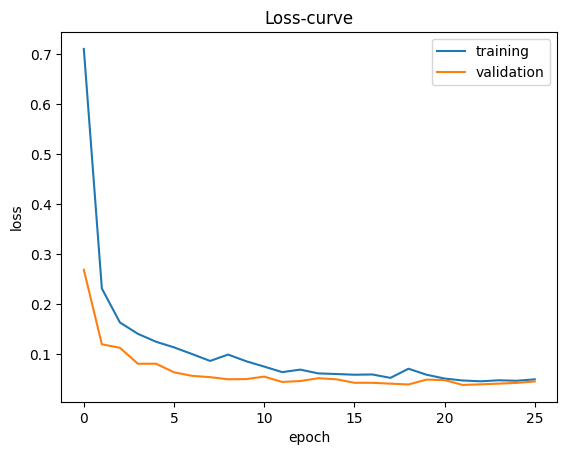

In [90]:
# plot loss-curve
pyplot.plot(history.history['loss'], label='training')
pyplot.plot(history.history['val_loss'], label='validation')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss-curve')
pyplot.legend()
pyplot.show()

**Experiment**

In [88]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle

# fit and evaluate a model
def evaluate_model_2(trainX, trainy,validX,validy, testX, testy):
 verbose, epochs, batch_size = 1, 1, 100
 n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], 7
 model = Sequential()
 model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_timesteps,n_features)))
 model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
 model.add(Dropout(0.5))
 model.add(MaxPooling1D(pool_size=2))
 model.add(Flatten())
 model.add(Dense(100, activation='relu'))
 model.add(Dense(n_outputs, activation='softmax')) # "softmax" for multi-class
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 # fit network
 history=model.fit(trainX, trainy, validation_data=(validX, validy), epochs=epochs, batch_size=batch_size,callbacks=[callback], verbose=verbose)
 #summarize_mode
 print(model.summary())
 # evaluate model
 _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
 # '_,'-->a variable is being used for a specific purpose, but its value is not of interest or not used in the subsequent code.
 return accuracy,history